NOTE: download `track_features.csv` from https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs first.

download to `./data/track_features.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from musicdl.mdl import MusicDownloader

This is a web scraped dataset of mp3s using the Spotify API and yt-dlp. I then computed embeddings from the mp3s using the feature representation from a pretrained genre classification model (MusiCNN convolutional neural network)

The idea is that since Spotify no longer allows access to their audio features API, I joined a kaggle dataset of Spotify audio features scrapped pre-ban with actually computable features using an intermediate musically-motivated representation of the raw audio from a Convolutional Neural Network trained on the Million Song Dataset.

https://github.com/jordipons/musicnn/blob/master/musicnn_example.ipynb

In [ ]:
#features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

con = sqlite3.connect("./data/music.db")
cur = con.cursor()

db_tracks = cur.execute("select id from tracks where id in (select track_id from audio_files where audio_files.video_id in (select video_id from audio_embeddings))")
results = db_tracks.fetchall()
tracks_subset = set([r[0] for r in results])

all_tracks = pd.read_csv("./data/tracks_features.csv")
df = all_tracks[all_tracks["id"].apply(lambda t: t in tracks_subset)]
df.set_index("id", inplace=True)

df

,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
id,,,,,,,,,,,,,,,,,,,,,
7jWbXvrgdbkajU8L28ahn5,Highwayman,Highwayman,6rFM5jHaGzwut3hGbG9pGU,"['The Highwaymen', 'Willie Nelson', 'Johnny Ca...","['6e7QpHYqEiyJGiM98IysLa', '5W5bDNCqJ1jbCgTxDD...",1,1,False,0.670,0.3510,...,0.0463,0.48000,0.0176,0.1150,0.450,101.384,182653,4.0,1985,1985-05-01
62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,No Strings Attached,20RMokVwJ2wjQ0s8FOdOFC,['*NSYNC'],['6Ff53KvcvAj5U7Z1vojB5o'],1,1,False,0.610,0.9260,...,0.0479,0.03100,0.0012,0.0821,0.861,172.638,200400,4.0,2000,2000-03-21
6leiB1fEsTnVCuPiielde5,Something Like That,A Place In The Sun,2EkJjknrgd5DeIH2x9HLjD,['Tim McGraw'],['6roFdX1y5BYSbp60OTJWMd'],9,1,False,0.507,0.8500,...,0.0472,0.37800,0.0000,0.0567,0.847,171.800,183733,4.0,1999,1999-05-04
4aarlAfLKVCTxUDNgbwhjH,Cry Baby (feat. DaBaby),Good News,0KjckH1EE6HRRurMIXSc0r,"['Megan Thee Stallion', 'DaBaby']","['181bsRPaVXVlUKXrxwZfHK', '4r63FhuTkUYltbVAg5...",3,1,True,0.957,0.4370,...,0.3590,0.00402,0.0000,0.2190,0.616,130.058,137984,4.0,2020,2020-11-20
0A1hoCfMLkiAgvhWkkucJa,Body,Good News,0KjckH1EE6HRRurMIXSc0r,['Megan Thee Stallion'],['181bsRPaVXVlUKXrxwZfHK'],8,1,True,0.914,0.7320,...,0.2410,0.01660,0.0000,0.1070,0.469,94.066,171067,4.0,2020,2020-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6dRx7OUXfvosnXG3g9lWGi,Flamenco Sketches,Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw,['Miles Davis'],['0kbYTNQb4Pb1rPbbaF0pT4'],5,1,False,0.349,0.0219,...,0.0425,0.89900,0.1200,0.0906,0.224,177.920,566133,3.0,1959,1959-08-17
1KixkQVDUHggZMU9dUobgm,My Head & My Heart,Heaven & Hell,26c7MmQ4w8EAvVLb4jilaM,['Ava Max'],['4npEfmQ6YuiwW1GpUmaq3F'],1,1,False,0.614,0.9340,...,0.0700,0.06970,0.0000,0.1210,0.436,116.001,174760,4.0,2020,2020-09-18
7DnAm9FOTWE3cUvso43HhI,Sweet but Psycho,Heaven & Hell,26c7MmQ4w8EAvVLb4jilaM,['Ava Max'],['4npEfmQ6YuiwW1GpUmaq3F'],16,1,False,0.720,0.7060,...,0.0473,0.06840,0.0000,0.1660,0.620,133.002,187436,4.0,2020,2020-09-18


<Axes: >

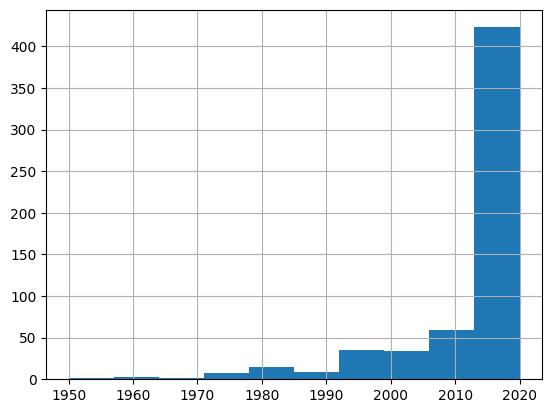

In [3]:

df["year"].hist()

In [4]:
df.columns

Index(['name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number',
       'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year',
       'release_date'],
      dtype='object')

In [5]:
metadata = ["name", "album", "album_id", "artists", "artist_ids", "track_number", "disc_number", "explicit", "key", "mode", "year", "release_date", "duration_ms"]
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

# embeddings = cur.execute("select id from tracks where id in (select track_id from audio_files where audio_files.video_id in (select video_id from audio_embeddings))")
results = cur.execute(
    "SELECT * from audio_embeddings ae "
    "JOIN audio_files af on af.video_id = ae.video_id "
    "JOIN tracks t on af.track_id = t.id "
)
embeddings = results.fetchall()

In [6]:
for i,v in enumerate(embeddings[0]):
    print(f"{i}: {v}")

0: -V97ECdX1nE
1: -0.988898515701294
2: -2.6837430000305176
3: -2.028550386428833
4: -2.410259246826172
5: -3.378455400466919
6: -4.196168899536133
7: -4.3703413009643555
8: -3.864495038986206
9: -2.651097297668457
10: -4.3023762702941895
11: -4.966493129730225
12: -4.3414626121521
13: -4.484045505523682
14: -4.169339179992676
15: -4.083503246307373
16: -3.329249620437622
17: -3.2706029415130615
18: -4.864048004150391
19: -4.753380298614502
20: -4.061717987060547
21: -4.691561222076416
22: -3.8153812885284424
23: -4.265685558319092
24: -4.8453264236450195
25: -3.393376588821411
26: -6.026034832000732
27: -3.66879940032959
28: -4.1056036949157715
29: -5.845388889312744
30: -4.660124778747559
31: -4.056742191314697
32: -6.107499122619629
33: -4.890567779541016
34: -1.898850917816162
35: -5.470639228820801
36: -5.168968677520752
37: -4.802295684814453
38: -5.773007392883301
39: -4.856186866760254
40: -5.301728248596191
41: -3.213484048843384
42: -5.221817493438721
43: -5.615651607513428
4

In [7]:
feature_df = df[features]
feature_df = feature_df.assign(embedding = None)
feature_df["embedding"] = feature_df["embedding"].astype("object")

In [8]:
ids = set(df.index)

for col in embeddings:
    track_id = col[54]
    embedding = col[1:51]
    if track_id in ids:
        feature_df.at[track_id, "embedding"] = np.array(embedding, dtype=float)

In [9]:
feature_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,embedding
id,,,,,,,,,,
7jWbXvrgdbkajU8L28ahn5,0.670,0.3510,-16.842,0.0463,0.48000,0.0176,0.1150,0.450,101.384,"[-1.7174714803695679, -2.6182730197906494, -4...."
62bOmKYxYg7dhrC6gH9vFn,0.610,0.9260,-4.843,0.0479,0.03100,0.0012,0.0821,0.861,172.638,"[-1.144309163093567, -0.781843900680542, -2.84..."
6leiB1fEsTnVCuPiielde5,0.507,0.8500,-5.679,0.0472,0.37800,0.0000,0.0567,0.847,171.800,"[-0.7309202551841736, -2.7271840572357178, -3...."
4aarlAfLKVCTxUDNgbwhjH,0.957,0.4370,-7.882,0.3590,0.00402,0.0000,0.2190,0.616,130.058,"[-3.3864760398864746, -2.3154664039611816, -3...."
0A1hoCfMLkiAgvhWkkucJa,0.914,0.7320,-6.100,0.2410,0.01660,0.0000,0.1070,0.469,94.066,"[-3.8698651790618896, -2.652343511581421, -3.9..."
...,...,...,...,...,...,...,...,...,...,...
6dRx7OUXfvosnXG3g9lWGi,0.349,0.0219,-21.065,0.0425,0.89900,0.1200,0.0906,0.224,177.920,"[-3.8271701335906982, -4.2707109451293945, -4...."
1KixkQVDUHggZMU9dUobgm,0.614,0.9340,-3.709,0.0700,0.06970,0.0000,0.1210,0.436,116.001,"[-3.3946619033813477, -0.5599659085273743, -4...."
7DnAm9FOTWE3cUvso43HhI,0.720,0.7060,-4.719,0.0473,0.06840,0.0000,0.1660,0.620,133.002,"[-3.214184284210205, -0.19161227345466614, -3...."


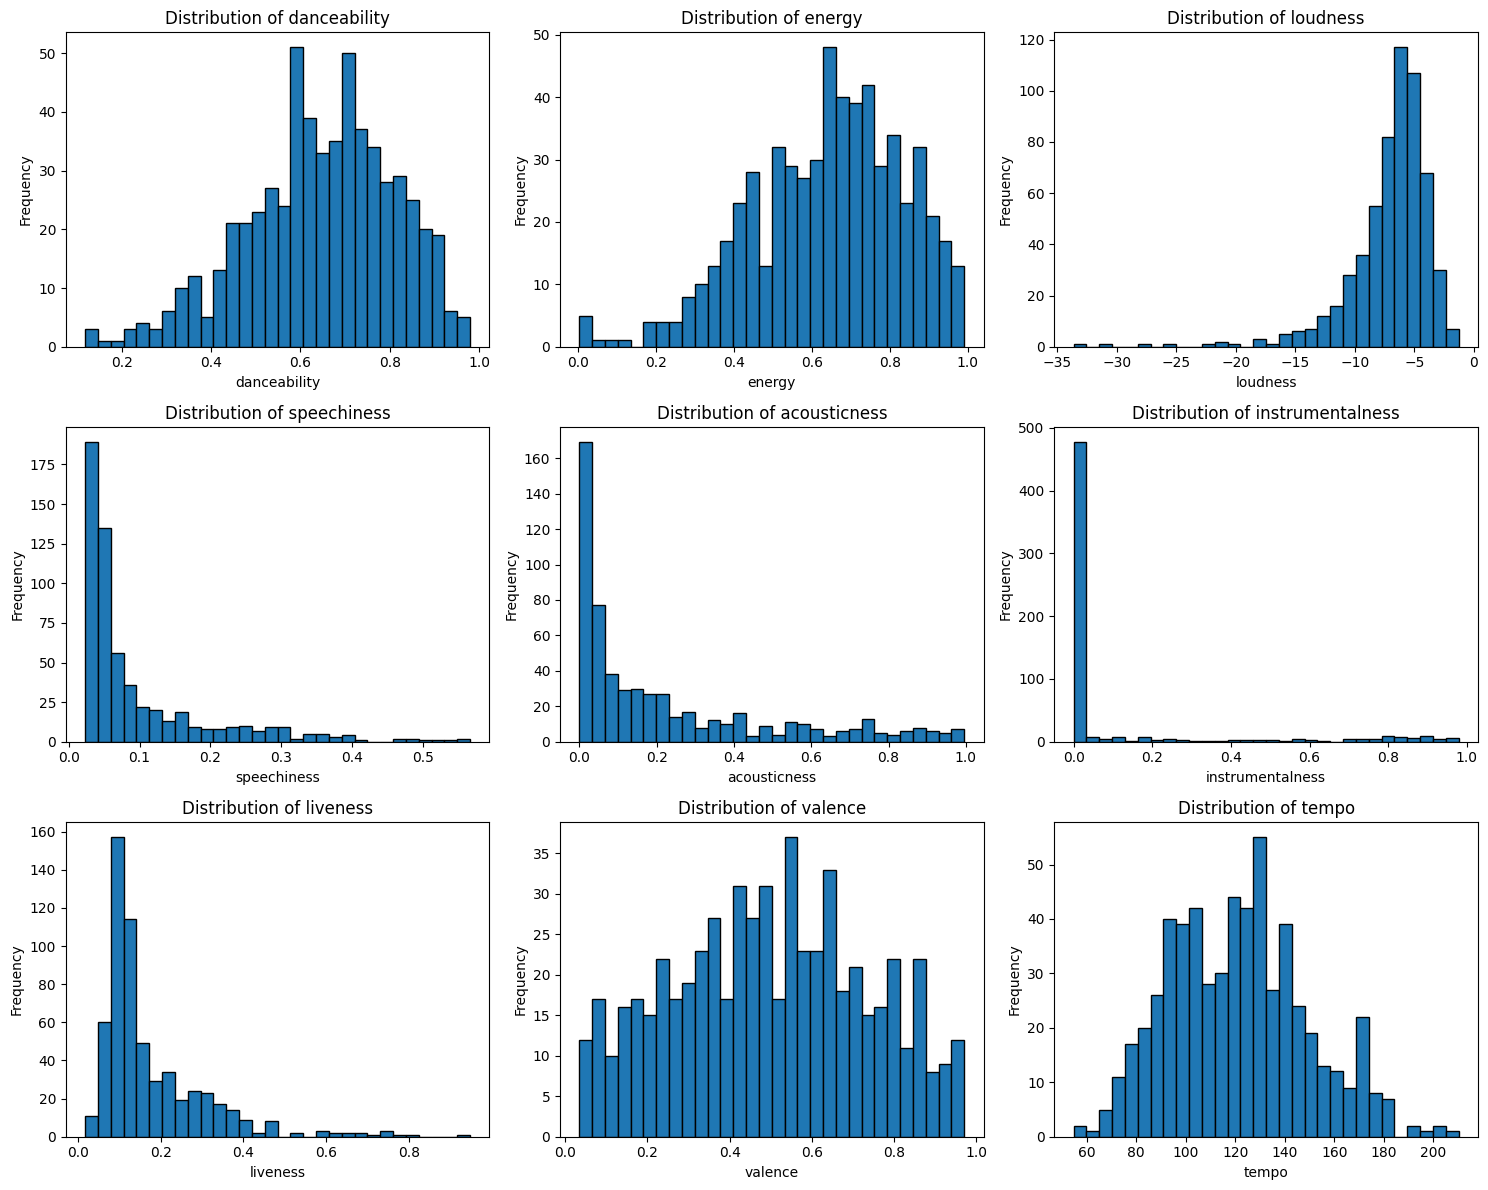

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(feature_df[feature], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
X = np.array(feature_df["embedding"].tolist())
X.shape

(588, 50)

In [ ]:
feature_df.to_pickle("./data/music_embeddings_df.pkl")
df[metadata].to_pickle("./data/music_metadata_df.pkl")